# GloFAS historical

In [1]:
import climetlab as cml
import xarray as xr
from climetlab_cems_flood.utils import get_po_basin

In [2]:

gdf = get_po_basin().dissolve()

ERROR 1: PROJ: proj_create_from_database: Open of /home/iacopo/.local/build/mambaforge/envs/cems/share/proj failed


In [21]:
# pontelagoscuro
ps = (44.886111, 11.604444)
cm = ( 45.142222,8.447500) # casale monferrato po
ca = (45.576944, 9.534722) # canonica d'adda

In [37]:
hist = cml.load_dataset(
            'glofas-historical',
            model='lisflood',
            product_type='intermediate',
            system_version='version_3_1',
            temporal_filter= '2021 * *',
            variable="river_discharge_in_the_last_24_hours",
            lat=cm[0],
            lon=cm[1],
            split_on = [('hmonth',2)],
            threads = 6,
            merger=None
        )

[45.142222, 8.4475, 45.142222, 8.4475]


  0%|                                                                                                                            | 0/6 [00:00<?, ?it/s]2022-12-16 14:31:37,564 INFO Welcome to the CDS
2022-12-16 14:31:37,565 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-historical
2022-12-16 14:31:37,634 INFO Welcome to the CDS
2022-12-16 14:31:37,635 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-historical
2022-12-16 14:31:37,644 INFO Request is queued
2022-12-16 14:31:37,708 INFO Request is queued
2022-12-16 14:31:37,733 INFO Welcome to the CDS
2022-12-16 14:31:37,734 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-historical
2022-12-16 14:31:37,738 INFO Welcome to the CDS
2022-12-16 14:31:37,738 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-historical
2022-12-16 14:31:37,767 INFO Request is queued
2022-12-16 14:31:37,785 INFO

In [38]:
dataset = hist.to_xarray()

In [39]:
dataset.dis24.latitude.values,dataset.dis24.longitude.values

(array([45.15, 45.05]), array([8.35, 8.45]))

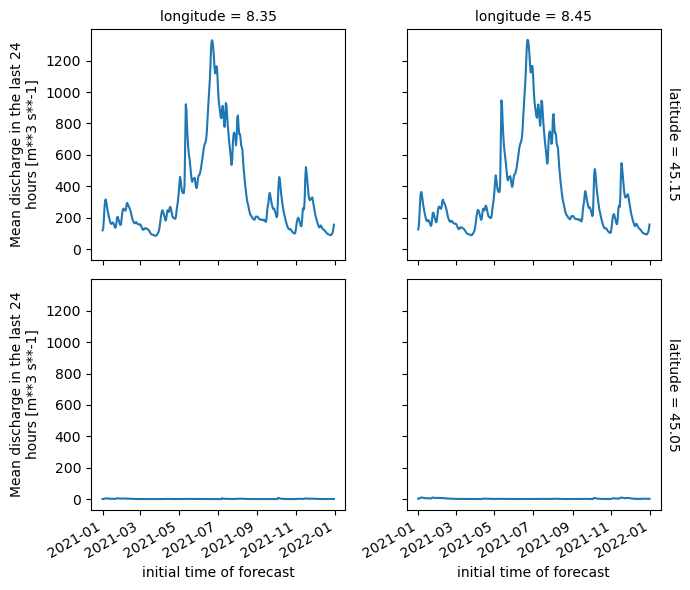

In [40]:
dataset.dis24.plot(row='latitude', col='longitude')

In [49]:
dataset.isel(time=13).dis24.values

array([[162.15625 , 182.70312 ],
       [  2.28125 ,   5.203125]], dtype=float32)